[-1.19175359 -0.83909963 -0.57735027 -0.36397023 -0.17632698  0.17632698
  0.36397023  0.57735027  0.83909963  1.19175359]
[0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]


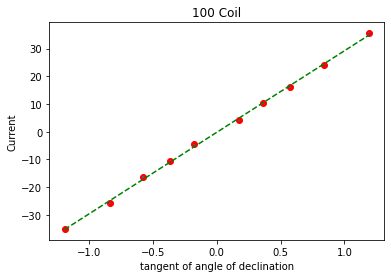

Slope =  29.415772049814656   
Error in slope =  0.0873493429214314   
Goodness of fit =  117.20689950259805


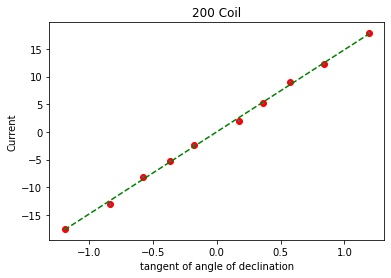

Slope =  14.862149492891321   
Error in slope =  0.0873493429214314   
Goodness of fit =  38.45901922555081


In [61]:
import physplot as phys
import numpy as np
from __future__ import division
import math


current100 = np.array([-35.2,-25.8,-16.3,-10.49,-4.58,4.08,10.34,16.01,24.20,35.70])
current200 = np.array([-17.52,-13.11,-8.09,-5.20,-2.39,1.98,5.22,9.09,12.28,17.83])


angles = np.array([-50,-40,-30,-20,-10,10,20,30,40,50])
angles = angles * math.pi / 180
angles = np.tan(angles)
errcurrent = np.array([0.2,.2,.2,.2,.2,.2,.2,.2,.2,.2])

print(angles)
print(errcurrent)
#plotfit takes in parameters in this order
#phys.plotfit(x,y,dy,title,'xlabel(units)','ylabel(units)','slope units')  Slope units will not render in LaTeX

phys.plotfit(angles,current100,errcurrent,'100 Coil','tangent of angle of declination','Current','')
phys.plotfit(angles,current200,errcurrent,'200 Coil','tangent of angle of declination','Current','')








The equation for the magnetic field of the earth based on current and angle of declination is 
### $B_{E} = \frac{\mu_{0}*N}{2r}*\frac{I}{\tan{\theta}}$
We must also divide this by 1000, because the current was measured in milliamps instead of the amps required for the equation

In [18]:
import math

##This function applies the above equation to an input of Number of coils and I/tan(theta)
def magnetic_field(slope,N):
    return(4*math.pi*10**-7*N/2/.109*slope/1000)

##slopes are retrieved from the above graphs
slope100 = 29.415772049814656
slope200 = 14.862149492891321
b1 = magnetic_field(slope100,100)
b2 = magnetic_field(slope200,200)

##error in slope is the uncertainty provided in the above graphs
radius = 21.8/100
err_radius = 0.1/100
err_slope100 = 0.0873493429214314
err_slope200 = 0.0873493429214314

##Error propagation using rule four
err100 = b1 * math.sqrt(   (err_radius/radius)**2 + (err_slope100/slope100)**2 + (2/100)**2   )
err200 = b2 * math.sqrt(   (err_radius/radius)**2 + (err_slope200/slope200)**2 + (2/200)**2   )

print('100 coils measured',round(b1,7),'+/-',round(err100,7),'Tesla')
print('200 coils measured',round(b2,7),'+/-',round(err200,7),'Tesla')

100 coils measured 1.7e-05 +/- 4e-07 Tesla
200 coils measured 1.71e-05 +/- 2e-07 Tesla


The actual measurement from NOAA was 1.84e-05 Tesla